In [1]:
import numpy as np
import skimage as sk
import scipy
import skimage.io as skio
import math
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import skimage.transform as sktr
import cv2

Part 1.1: Finite Difference Operator

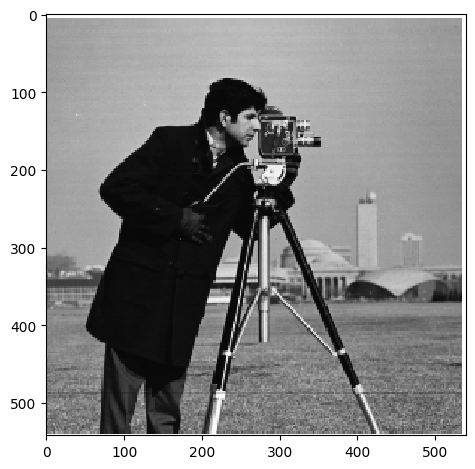

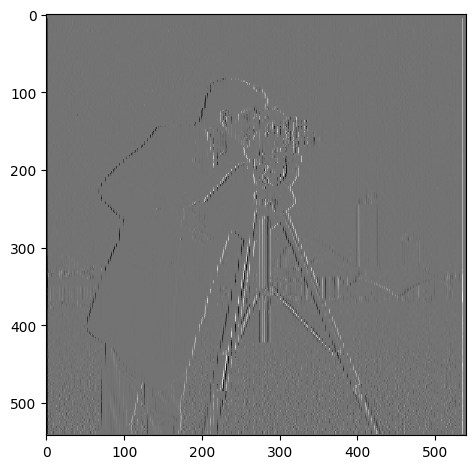

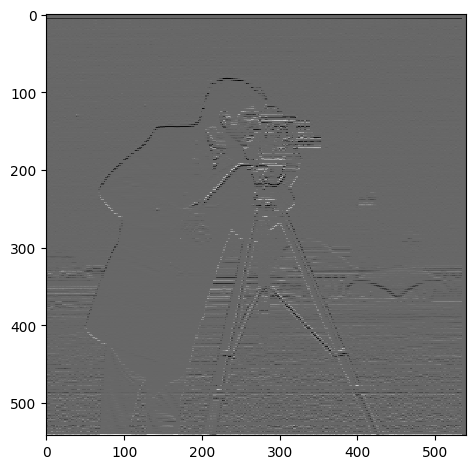

In [182]:
images=['cameraman.png']
for i in images:
    im = skio.imread(i)
    im =im[:,:,:3]
    im = sk.color.rgb2gray(im)
    dx=np.array([[1,-1]])
    dy=np.array([[1],[-1]])

    # im=np.linalg.norm(im)
    i_dx=scipy.signal.convolve2d(im,dx, mode='same')
    i_dy=scipy.signal.convolve2d(im,dy, mode='same')

    # i_dx = (i_dx * 255).astype(np.uint8)
    # i_dy = (i_dy * 255).astype(np.uint8)

    i_dx_n=(i_dx - i_dx.min()) / (i_dx.max() - i_dx.min())
    i_dy_n=(i_dy - i_dy.min()) / (i_dy.max() - i_dy.min())
    i_dx_norm = ( i_dx_n* 255).astype(np.uint8)
    i_dy_norm = (i_dy_n * 255).astype(np.uint8)


    # display the image
    skio.imshow(i)
    skio.show()
    skio.imshow(i_dx_norm)
    skio.show()
    skio.imshow(i_dy_norm)

    skio.show()
    skio.imsave(f'dx_cameraman.png', i_dx_norm)
    skio.imsave(f'dy_cameraman.png', i_dy_norm)



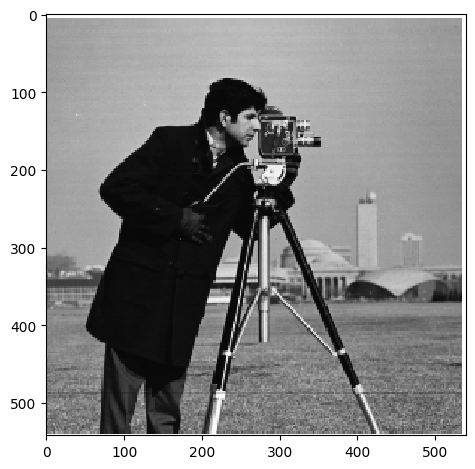

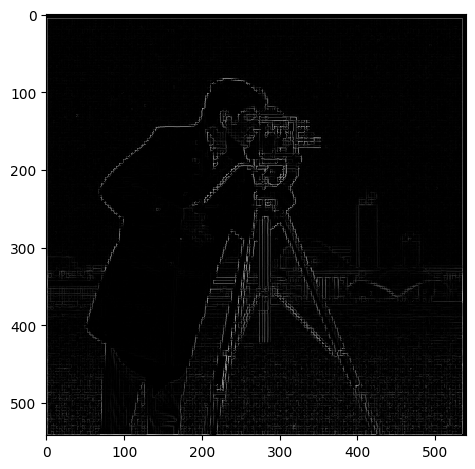

In [183]:
# Gradient Magnitude Image

gradient= np.sqrt(np.add(np.square(i_dx),np.square(i_dy)))
gradient=(gradient - gradient.min()) / (gradient.max() - gradient.min())
gradient = (gradient * 255).astype(np.uint8)

# display the image
skio.imshow(i)
skio.show()
skio.imshow(gradient)
skio.show()
# skio.imsave(f'dy_cameraman.png', i_dy_norm)



Threshold:  1


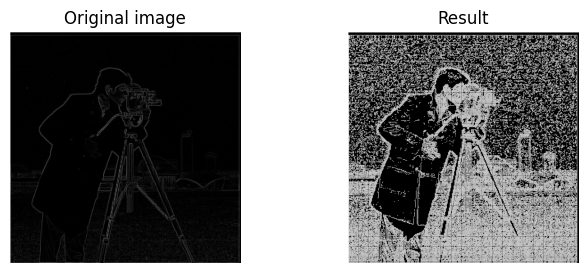

Threshold:  10


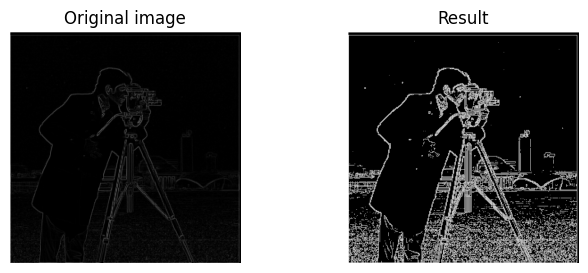

Threshold:  20


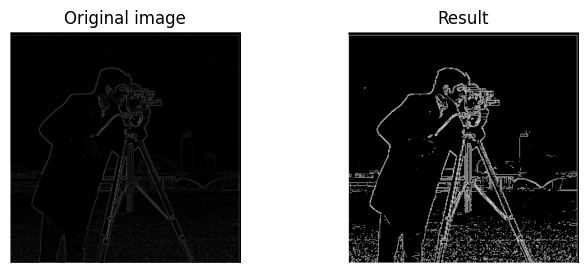

Threshold:  30


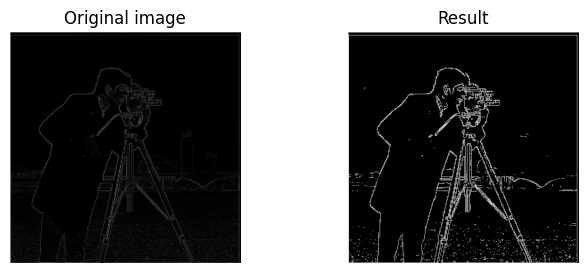

Threshold:  40


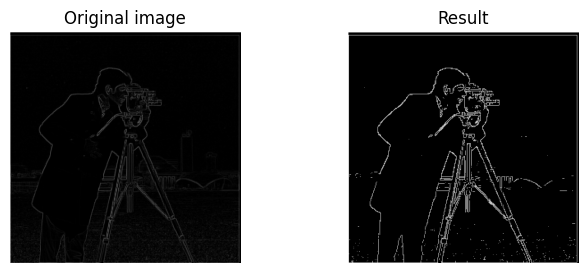

Threshold:  50


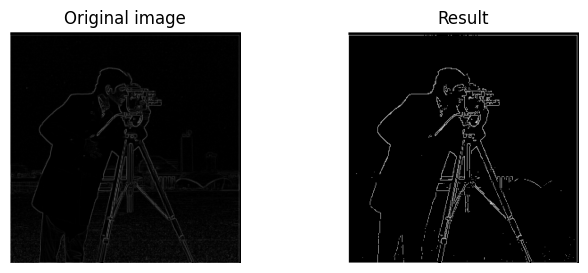

Threshold:  60


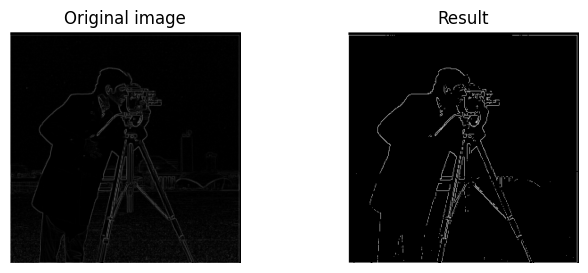

Threshold:  70


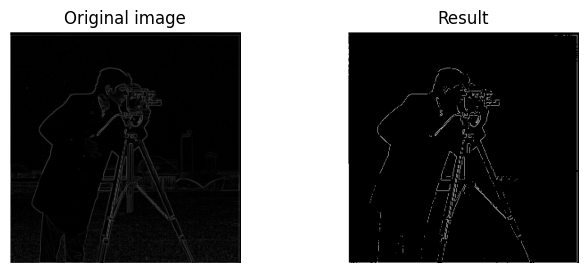

Threshold:  80


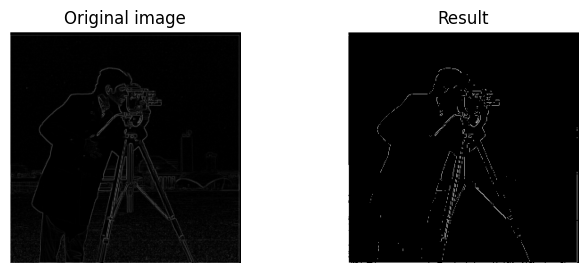

In [184]:
# Binarizing the gradient magnitude using threshold
from skimage.filters import threshold_mean


thresh= [1,10,20,30,40,50,60,70,80]
# thresh = threshold_mean(gradient)
for t in thresh:
    print("Threshold: ",t)
    binary = gradient > t

    fig,axes = plt.subplots(ncols=2, figsize=(8, 3))
    ax = axes.ravel()

    ax[0].imshow(gradient, cmap=plt.cm.gray)
    ax[0].set_title('Original image')

    ax[1].imshow(binary, cmap=plt.cm.gray)
    ax[1].set_title('Result')

    for a in ax:
        a.set_axis_off()

    plt.show()

Part 1.2: Derivative of Gaussian (DoG) Filter

In [185]:
def GradientMag(a, dx, dy):
    im = skio.imread(a)
    # im =im[:,:,:3]
    im = sk.color.rgb2gray(im)
    # dx=np.array([[1,-1]])
    # dy=np.array([[1],[-1]])

    # im=np.linalg.norm(im)
    i_dx=scipy.signal.convolve2d(im,dx, mode='same')
    i_dy=scipy.signal.convolve2d(im,dy, mode='same')

    # i_dx = (i_dx * 255).astype(np.uint8)
    # i_dy = (i_dy * 255).astype(np.uint8)

    i_dx_n=(i_dx- i_dx.min())/ (i_dx.max() -i_dx.min())
    i_dy_n=(i_dy- i_dy.min())/ (i_dy.max() -i_dy.min())
    gradient= np.sqrt(np.add(np.square(i_dx),np.square(i_dy)))
    gradient = (gradient * 255).astype(np.uint8)
    t=30
    binary = gradient > t

    return binary
        # ax[1].imshow(binary, cmap=plt.cm.gray)



In [186]:
def Blur(a):
    # create blured convolving gaussian and repeat previous, then outer product with transpose 
    im =cv2.imread(a)
    # im=im[:,:,:3]
    im = sk.color.rgb2gray(im)

    g =cv2.getGaussianKernel(11,3) 
    gaus=np.outer(g,g.T)
    blur=scipy.signal.convolve2d(im,gaus, mode='same')

    return blur


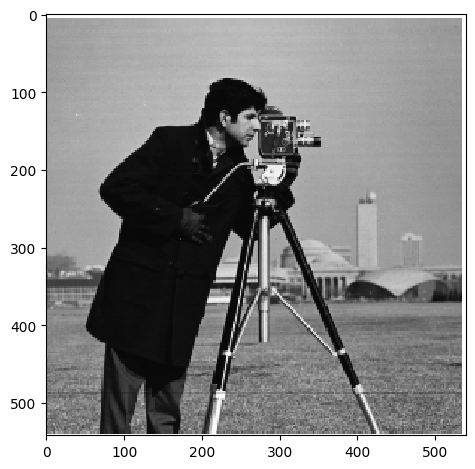

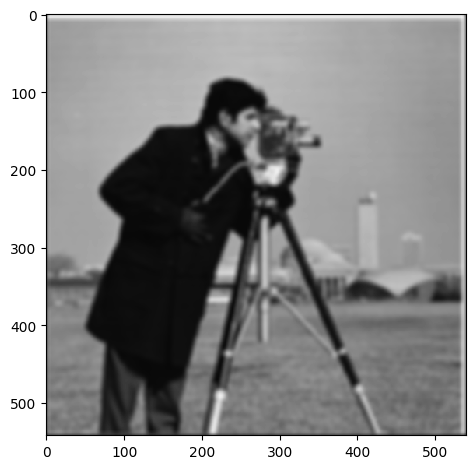

In [187]:
images=['cameraman.png']

for i in images:
    
    g= Blur(i)
    
    gaus = ( g* 255).astype(np.uint8)
    # display the image
    skio.imshow(i)
    skio.show()
    # plt.imshow(g,cmap='gray')
    skio.imshow(gaus)
    skio.show()
    skio.imsave(f'blurry_cameraman.png', gaus)

    


In [188]:
# Single convolution 
def Blur(a):
    im =cv2.imread(a)
    im=im[:,:,:3]
    im = sk.color.rgb2gray(im)

    g =cv2.getGaussianKernel(17,3) 
    gaus=np.outer(g,g.T)
    dx=np.array([[1,-1]])
    dy=np.array([[1],[-1]])
    
    # gaus=np.outer(g,g)
    doGx=scipy.signal.convolve2d(gaus,dx, mode='same')
    # plt.imshow(doGx,cmap='gray')

    doGy=scipy.signal.convolve2d(gaus,dy, mode='same')
    # plt.imshow(doGy,cmap='gray')

    doG= np.sqrt(np.add(np.square(doGx),np.square(doGy)))
    
    # blur_gx=scipy.signal.convolve2d(im,doGx, mode='same')
    # blur_gy=scipy.signal.convolve2d(im,doGy, mode='same')
    # blur= np.sqrt(np.add(np.square(blur_gx),np.square(blur_gy)))
    blur=scipy.signal.convolve2d(im,doG, mode='same')
    

    return blur


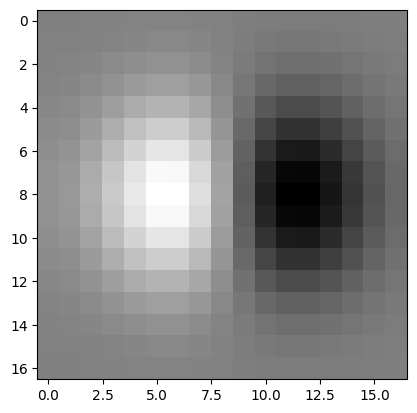

In [196]:
g =cv2.getGaussianKernel(17,3) 
gaus=np.outer(g,g.T)
dx=np.array([[1,-1]])
dy=np.array([[1],[-1]])

# gaus=np.outer(g,g)
doGx=scipy.signal.convolve2d(gaus,dx, mode='same')
plt.imshow(doGx,cmap='gray')



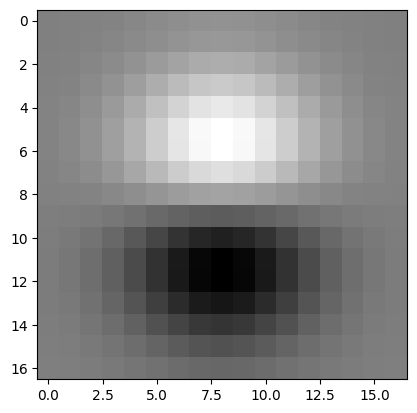

In [197]:
doGy=scipy.signal.convolve2d(gaus,dy, mode='same')
plt.imshow(doGy,cmap='gray')


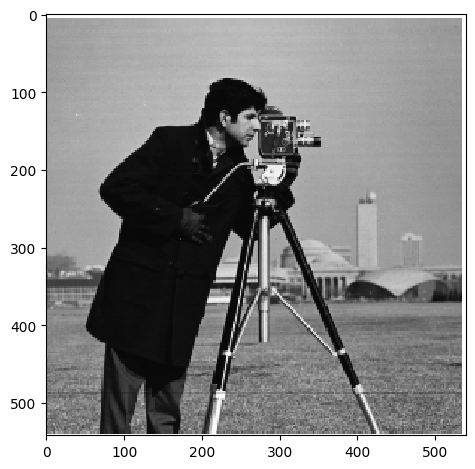

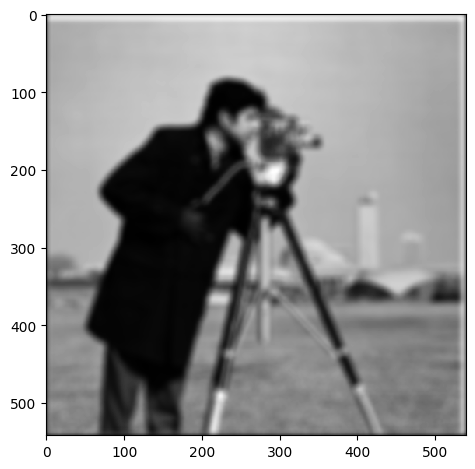

In [202]:
images=['cameraman.png']

for i in images:
    

    g= Blur(i)
    g=(g - g.min()) / (g.max() - g.min())

    gaus= ( g* 255).astype(np.uint8)

    


    # display the image
    skio.imshow(i)
    skio.show()
    # plt.imshow(g,cmap='gray')
    skio.imshow(gaus)
    skio.show()
    skio.imsave(f'bluryy.png', gaus)


Part 2.1: Image "Sharpening"

In [2]:
# Low pass filter
def LowPass(a):
    im = sk.color.rgb2gray(a)
    g =cv2.getGaussianKernel(17,3) 
    gaus=np.outer(g,g)
    low=scipy.signal.convolve2d(im,gaus, mode='same')
    return low


In [3]:
def HighPass(a,low):

    im = sk.color.rgb2gray(a)
    high=np.subtract(im,low)

    return high

In [4]:
def convolve_rgb(a, b,alpha):
    im= np.zeros_like(a)
    im[:,:,0]= scipy.signal.convolve2d(a[:,:,0],b*alpha, mode='same')
    im[:,:,1]= scipy.signal.convolve2d(a[:,:,1],b*alpha, mode='same')
    im[:,:,2]= scipy.signal.convolve2d(a[:,:,2],b*alpha, mode='same')
    return im    

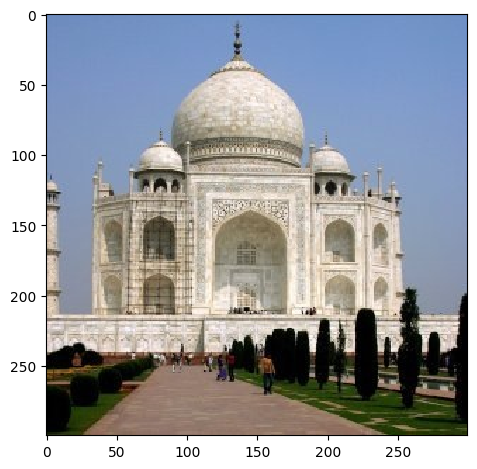

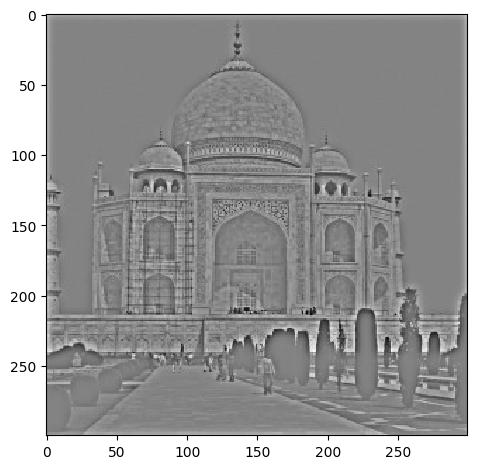

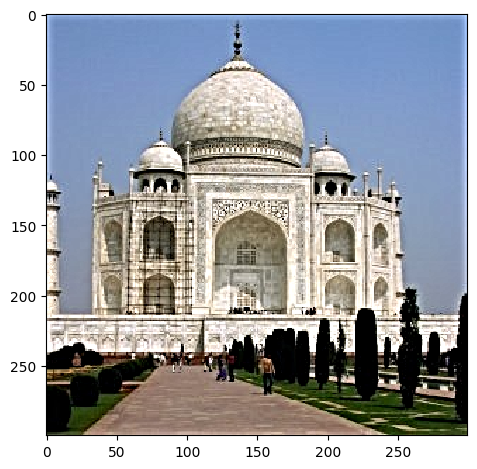

In [219]:
images=['taj.jpg']

for i in images:
    # low_r, low_b, low_g= LowPass(i)
    im = skio.imread(i)

    # convert to double (might want to do this later on to save memory)    
    im = sk.img_as_float(im)
    low=LowPass(im)
    # g=np.dstack([low_b, low_g,low_r])
    # im=im[:,:,:3]
    high=HighPass(im,low)
    

    h=(high - high.min()) / (high.max() - high.min())
    # h =np.clip(high,high.min(),high.max())
    # display the image
    skio.imshow(i)
    skio.show()
    # plt.imshow(g,cmap='gray')
    hi=np.dstack([h, h,h])
    hi = np.clip(hi* 255, 0, 255).astype(np.uint8)

    skio.imshow(hi)
    skio.show()
    skio.imsave(f'taj_high.png', hi)
    h=np.dstack([high, high,high])

    
    image = skio.imread(i)
    im = sk.img_as_float(image)

    # high=(high-np.mean(high))/np.std(high)

    # high= ( high* 255).astype(np.uint8)

    
    # h=np.stack([high]*3,axis=-1)
    # high_res=(h - h.min()) / (h.max() - h.min())
    # high_res=(h-np.mean(h))/np.std(h)
    a=1.1
    # print(image[:,:,0].shape)
    # s= convolve_rgb(im, high,a)
    # s1= scipy.signal.convolve2d(im[:,:,0],high*a, mode='same')
    # s2= scipy.signal.convolve2d(im[:,:,1],high*a, mode='same')
    # s3= scipy.signal.convolve2d(im[:,:,2],high*a, mode='same')
    
    # s=np.dstack([s1, s2,s3])
    s=np.add(im,h*a)
    
    # s= ( s* 255).astype(np.uint8)

    # s=np.clip(s,0,255)
    s = np.clip(s* 255, 0, 255).astype(np.uint8)
    # s = (s*255).astype(np.uint8)

    # sharp=(s - s.min()) / (s.max() - s.min())

    # sharp= ( s* 255).astype(np.uint8)
    # display the image
    skio.imshow(s)
    skio.show()
    skio.imsave(f'taj_sharp.png', s)

    
    


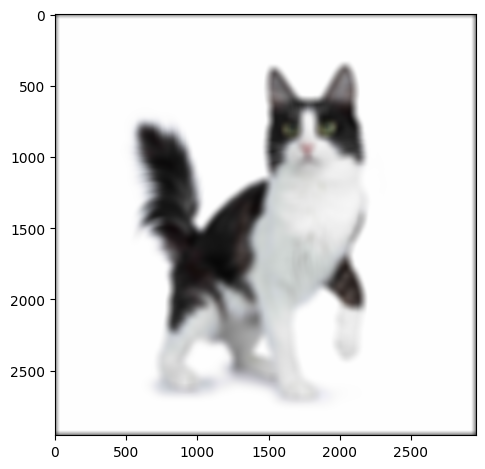

c:\Users\Jae\anaconda\envs\scraper\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:158: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


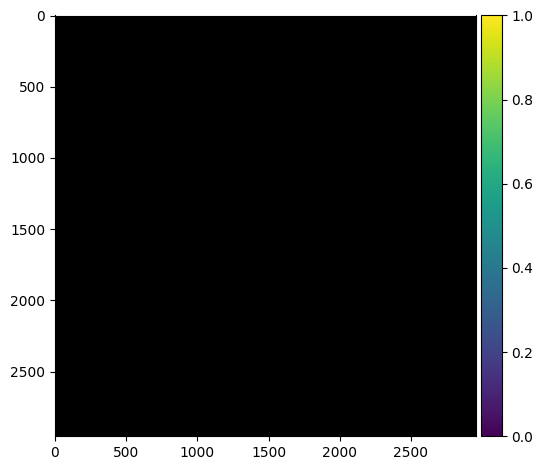

C:\Users\Jae\AppData\Local\Temp\ipykernel_41180\544342090.py:40: UserWarning: high_cat.png is a low contrast image
  skio.imsave(f'high_cat.png', hi)


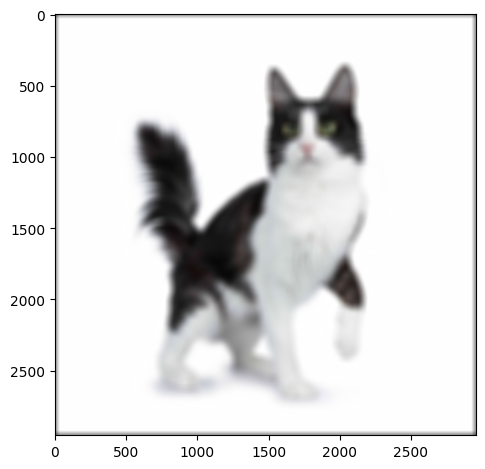

In [9]:
images=['angora.jpg']

for i in images:
    # low_r, low_b, low_g= LowPass(i)
    im = skio.imread('angora.jpg')
    b=70
    c=31
    im = sk.img_as_float(im)

    im = LowPassColor(im,b,c)

    
    
    im_blur = np.clip(im* 255, 0, 255).astype(np.uint8)

    skio.imshow(im_blur)
    skio.show()
    skio.imsave(f'blur_cat.png', im_blur)

    # convert to double (might want to do this later on to save memory)    
    low=LowPass(im)
    # g=np.dstack([low_b, low_g,low_r])
    # im=im[:,:,:3]
    high=HighPass(im,low)
    

    # h=(high - high.min()) / (high.max() - high.min())
    # h =np.clip(high,high.min(),high.max())
    # display the image
    h=(high - high.min()) / (high.max() - high.min())
    # h =np.clip(high,high.min(),high.max())
    # display the image

    # plt.imshow(g,cmap='gray')
    hi=np.dstack([h, h,h])
    hi = np.clip(hi*255, 0, 255).astype(np.uint8)

    skio.imshow(hi)
    skio.show()
    skio.imsave(f'high_cat.png', hi)
    
    # image = skio.imread(i)
    # im = sk.img_as_float(image)

    # high=(high-np.mean(high))/np.std(high)

    # high= ( high* 255).astype(np.uint8)

    h=np.dstack([high, high,high])
    # h=np.stack([high]*3,axis=-1)
    # high_res=(h - h.min()) / (h.max() - h.min())
    # high_res=(h-np.mean(h))/np.std(h)
    a=1.1
    # print(image[:,:,0].shape)
    # s= convolve_rgb(im, high,a)
    # s1= scipy.signal.convolve2d(im[:,:,0],high*a, mode='same')
    # s2= scipy.signal.convolve2d(im[:,:,1],high*a, mode='same')
    # s3= scipy.signal.convolve2d(im[:,:,2],high*a, mode='same')
    
    # s=np.dstack([s1, s2,s3])
    s=np.add(im,h*a)
    
    # s= ( s* 255).astype(np.uint8)

    # s=np.clip(s,0,255)
    s = np.clip(s* 255, 0, 255).astype(np.uint8)
    # s = (s*255).astype(np.uint8)

    # sharp=(s - s.min()) / (s.max() - s.min())

    # sharp= ( s* 255).astype(np.uint8)
    # display the image
    skio.imshow(s)
    skio.show()
    skio.imsave(f'sharp_cat.png', s)

    
    


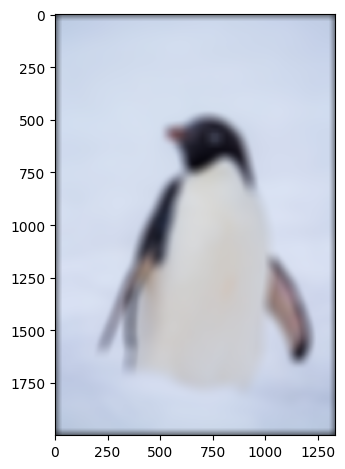

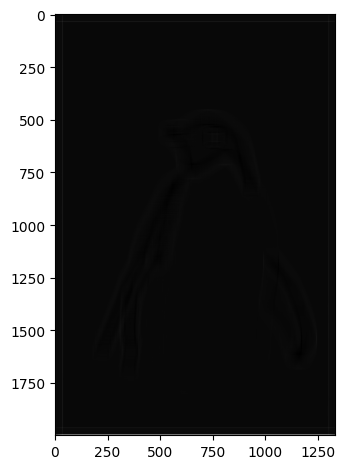

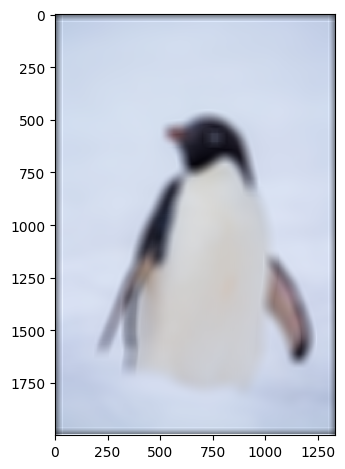

In [11]:
images=['penguin.jpg']

for i in images:
    # low_r, low_b, low_g= LowPass(i)
    im = skio.imread(i)
    b=70
    c=31
    im = sk.img_as_float(im)

    im = LowPassColor(im,b,c)
    im_blur = np.clip(im* 255, 0, 255).astype(np.uint8)

    skio.imshow(im_blur)
    skio.show()
    skio.imsave(f'blur_penguin.png', im_blur)

    # convert to double (might want to do this later on to save memory)    
    low=LowPass(im)
    # g=np.dstack([low_b, low_g,low_r])
    # im=im[:,:,:3]
    high=HighPass(im,low)
    

    h=(high - high.min()) / (high.max() - high.min())
    # h =np.clip(high,high.min(),high.max())

    # plt.imshow(g,cmap='gray')
    hi=np.dstack([h, h,h])
    hi = np.clip(hi*255, 0, 255).astype(np.uint8)

    skio.imshow(hi)
    skio.show()

    skio.imsave(f'high_penguin.png', hi)
    
    # image = skio.imread(i)
    # im = sk.img_as_float(image)

    # high=(high-np.mean(high))/np.std(high)

    # high= ( high* 255).astype(np.uint8)

    h=np.dstack([high, high,high])
    # h=np.stack([high]*3,axis=-1)
    # high_res=(h - h.min()) / (h.max() - h.min())
    # high_res=(h-np.mean(h))/np.std(h)
    a=7
    # print(image[:,:,0].shape)
    # s= convolve_rgb(im, high,a)
    # s1= scipy.signal.convolve2d(im[:,:,0],high*a, mode='same')
    # s2= scipy.signal.convolve2d(im[:,:,1],high*a, mode='same')
    # s3= scipy.signal.convolve2d(im[:,:,2],high*a, mode='same')
    
    # s=np.dstack([s1, s2,s3])
    s=np.add(im,h*a)
    
    # s= ( s* 255).astype(np.uint8)

    # s=np.clip(s,0,255)
    s = np.clip(s* 255, 0, 255).astype(np.uint8)
    # s = (s*255).astype(np.uint8)

    # sharp=(s - s.min()) / (s.max() - s.min())

    # sharp= ( s* 255).astype(np.uint8)
    # display the image
    skio.imshow(s)
    skio.show()
    skio.imsave(f'sharp_penguin.png', s)

    
    


In [12]:
# scipy.signal.unit_impulse

def unmask(i,a):
    # im=im[:,:,:3]
    # f*((1+a)e-ag)
    g =cv2.getGaussianKernel(17,3) 
    g=np.outer(g,g)

    e= scipy.signal.unit_impulse(g.shape)

    ma=1+a
    ret=(ma*e)-(a*g)
    s =scipy.signal.convolve2d(i,ret, mode='same')

    # s = np.clip(s, 0, 255).astype(np.uint8)
    # sharp=(s - s.min()) / (s.max() - s.min())

    return s


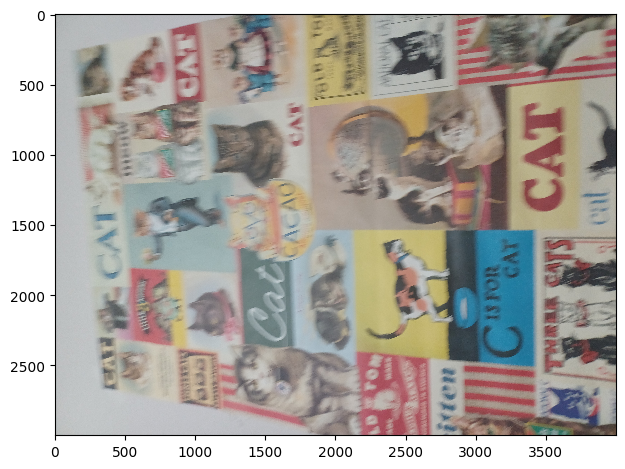

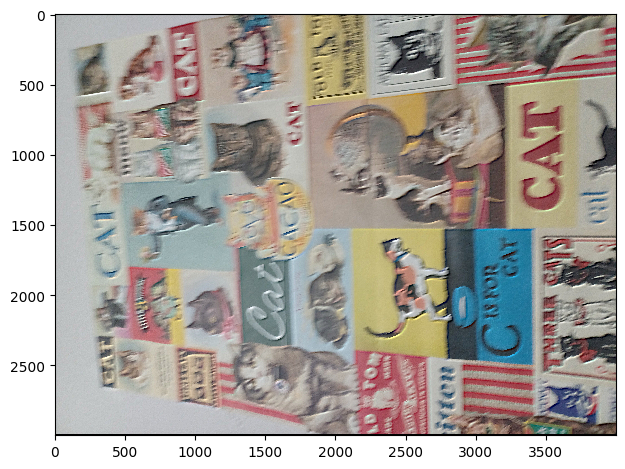

In [17]:
images=['poster.jpg']

for i in images:
    # low_r, low_b, low_g= LowPass(i)
    im = skio.imread(i)


    blue,green,red=cv2.split(im)

    
    # low_r, low_b, low_g= LowPass(i)
    b=unmask(blue,1)
    g=unmask(green,1)
    r=unmask(red,1)
    plt.imshow(b)
    un=cv2.merge([b,g,r])

    un = np.clip(un, 0, 255).astype(np.uint8)
    # unmask = (unmask*255).astype(np.uint8)
    # b = (b*255).astype(np.uint8)
    # un=(un - un.min()) / (un.max() - un.min())


    # plt.imshow(g,cmap='gray')
    skio.imshow(i)
    skio.show()
    skio.imshow(un)
    skio.show()
    skio.imsave(f'sharp_penguin.png', un)



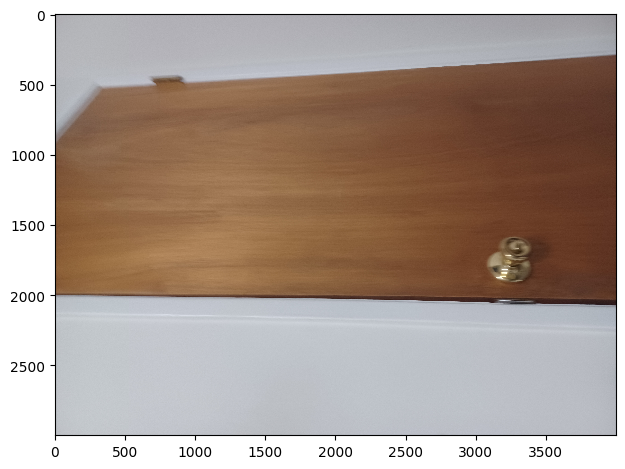

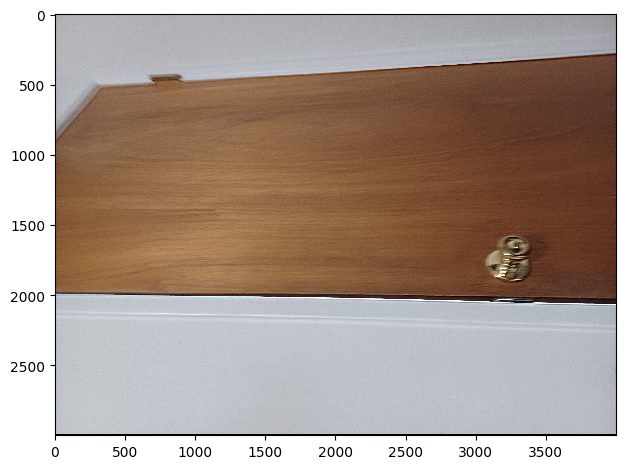

In [18]:
images=['door.jpg']

for i in images:
    # low_r, low_b, low_g= LowPass(i)
    im = skio.imread(i)


    blue,green,red=cv2.split(im)

    
    # low_r, low_b, low_g= LowPass(i)
    b=unmask(blue,1)
    g=unmask(green,1)
    r=unmask(red,1)
    plt.imshow(b)
    un=cv2.merge([b,g,r])

    un = np.clip(un, 0, 255).astype(np.uint8)
    # unmask = (unmask*255).astype(np.uint8)
    # b = (b*255).astype(np.uint8)
    # un=(un - un.min()) / (un.max() - un.min())


    # plt.imshow(g,cmap='gray')
    skio.imshow(i)
    skio.show()
    skio.imshow(un)
    skio.show()
    skio.imsave(f'sharp_door.png', un)



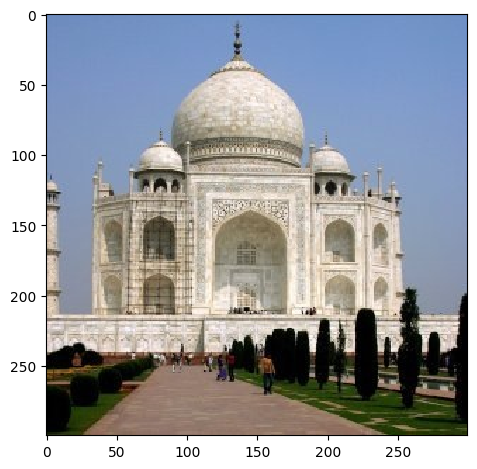

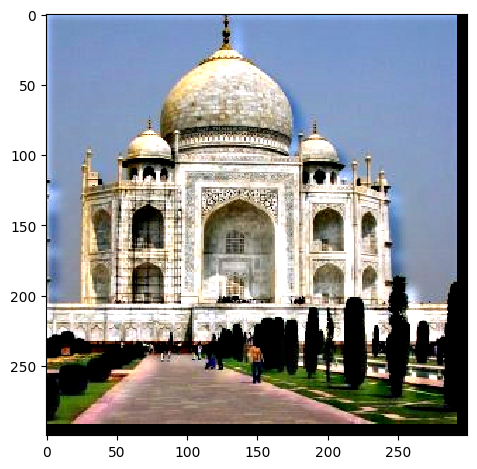

TypeError: Cannot handle this data type: (1, 1, 3), <f8

In [6]:
images=['taj.jpg']

for i in images:
    im = skio.imread(i)
    blue,green,red=cv2.split(im)
    # low_r, low_b, low_g= LowPass(i)
    b=unmask(blue,1)
    g=unmask(green,1)
    r=unmask(red,1)
    plt.imshow(b)
    un=cv2.merge([b,g,r])

    un = np.clip(un, 0, 255).astype(np.uint8)
    # unmask = (unmask*255).astype(np.uint8)
    # b = (b*255).astype(np.uint8)
    un=(un - un.min()) / (un.max() - un.min())




    
    skio.imshow(i)
    skio.show()
    # plt.imshow(g,cmap='gray')

    skio.imshow(un)
    skio.show()
    skio.imsave(f'sharp_unmask_taj.png', un)



Part 2.2: Hybrid Images

In [8]:
def LowPassColor(a,b,c):
    # im = sk.color.rgb2gray(a)
    blue,green,red=cv2.split(a)

    g =cv2.getGaussianKernel(b,c) 
    gaus=np.outer(g,g)
    lowb=scipy.signal.convolve2d(blue,gaus, mode='same')
    lowg=scipy.signal.convolve2d(green,gaus, mode='same')
    lowr=scipy.signal.convolve2d(red,gaus, mode='same')
    low =cv2.merge([lowb,lowg, lowr])

    return low

In [43]:
def HighPass(a,low):

    # im = sk.color.ray(a)
    high=np.subtract(a,low)

    return high

In [45]:
def hybrid_image(im1, im2, sigma1, sigma2,b,c):
     low =LowPassColor(im1,b,c)
     low2=LowPassColor(im2,b,c)
     high=HighPass(im2,low2)
     hyb =np.add(low*sigma1, high*sigma2)
     return hyb

(1349, 737, 3)


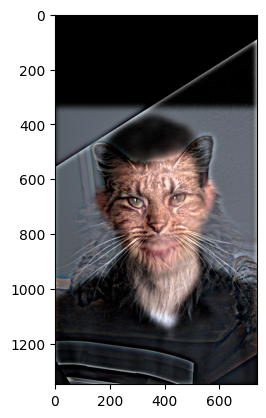

In [73]:
im1='image_Derek.png'
im2='image_Nutmeg.png'
im1 = skio.imread(im1)
im2 = skio.imread(im2)
sigma1 = 2
sigma2 = 3

# low_r, low_b, low_g= LowPass(i)

# low_r, low_b, low_g= LowPass(i)
b=41
c=11
hybrid = hybrid_image(im1, im2, sigma1, sigma2,b,c)
# hybrid= (hybrid * 255).astype(np.uint8)  # Convert to uint8
print(hybrid.shape)
hybrid=hybrid*0.5
hybrid= np.clip(hybrid, 0, 255).astype(np.uint8)

# hybrid=(hybrid - hybrid.min()) / (hybrid.max() - hybrid.min())

plt.imshow(hybrid)
plt.show
skio.imsave(f'Derkmeg.png', hybrid)

# ## Compute and display Gaussian and Laplacian Pyramids
# ## You also need to supply this function
# N = 5 # suggested number of pyramid levels (your choice)
# pyramids(hybrid, N)

(589, 933, 3)


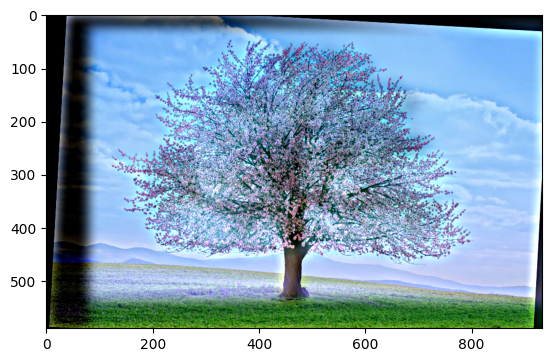

In [156]:
im1='empty.png'
im2='flower.png'
im1 = skio.imread(im1)
im2 = skio.imread(im2)
sigma1 = 2
sigma2 = 3

# low_r, low_b, low_g= LowPass(i)

# low_r, low_b, low_g= LowPass(i)
b=41
c=11
hybrid = hybrid_image(im1, im2, sigma1, sigma2,b,c)
# hybrid= (hybrid * 255).astype(np.uint8)  # Convert to uint8
print(hybrid.shape)
hybrid=hybrid*0.5
hybrid= np.clip(hybrid, 0, 255).astype(np.uint8)

# hybrid=(hybrid - hybrid.min()) / (hybrid.max() - hybrid.min())

plt.imshow(hybrid)
plt.show
skio.imsave(f'flowmpty.png', hybrid)

# ## Compute and display Gaussian and Laplacian Pyramids
# ## You also need to supply this function
# N = 5 # suggested number of pyramid levels (your choice)
# pyramids(hybrid, N)

(673, 694, 3)


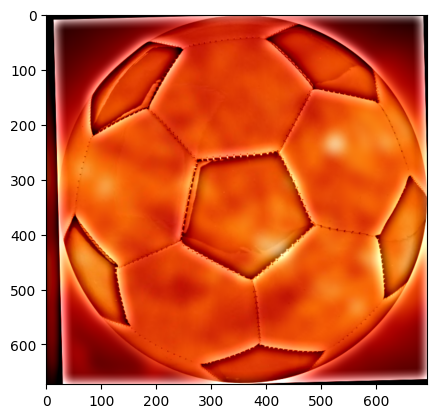

In [157]:
im1='sunny.png'
im2='balll.png'
im1 = skio.imread(im1)
im2 = skio.imread(im2)
sigma1 = 2
sigma2 = 3

# low_r, low_b, low_g= LowPass(i)

# low_r, low_b, low_g= LowPass(i)
b=41
c=11
hybrid = hybrid_image(im1, im2, sigma1, sigma2,b,c)
# hybrid= (hybrid * 255).astype(np.uint8)  # Convert to uint8
print(hybrid.shape)
hybrid=hybrid*0.5
hybrid= np.clip(hybrid, 0, 255).astype(np.uint8)

# hybrid=(hybrid - hybrid.min()) / (hybrid.max() - hybrid.min())

plt.imshow(hybrid)
plt.show
skio.imsave(f'sunnyball.png', hybrid)

# ## Compute and display Gaussian and Laplacian Pyramids
# ## You also need to supply this function
# N = 5 # suggested number of pyramid levels (your choice)
# pyramids(hybrid, N)

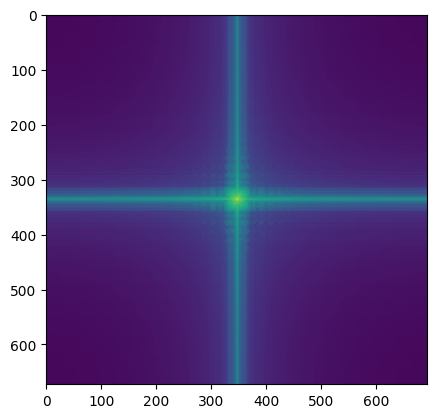

In [159]:
# low frequency
low =LowPassColor(im1,b,c)
low2=LowPassColor(im2,b,c)
high=HighPass(im2,low2)
hyb =np.add(low*sigma1, high*sigma2)
im = sk.color.rgb2gray(low)

plt.imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(im)))))

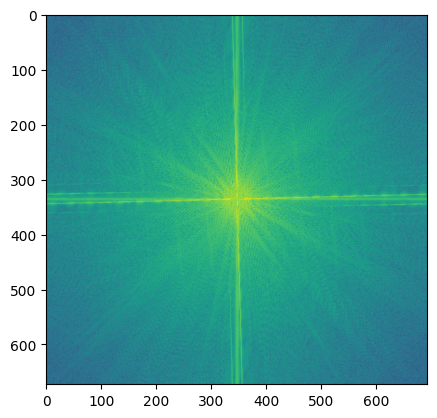

In [160]:
# high frequency
im = sk.color.rgb2gray(high)

plt.imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(im)))))

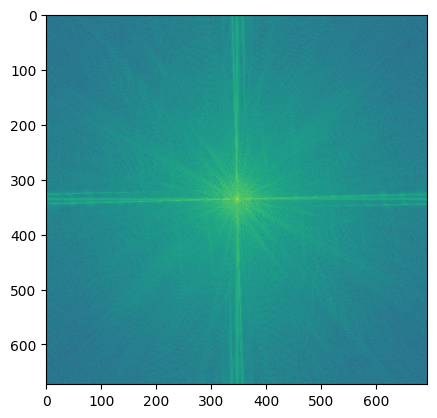

In [158]:
# both frequency
im = sk.color.rgb2gray(hybrid)

plt.imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(im)))))

Part 2.3: Gaussian and Laplacian Stacks

In [68]:
def gaussian(prev,b,c):
    low=LowPassColor(prev,b,c)
    lap= np.subtract(prev,low)
    return low, lap
            

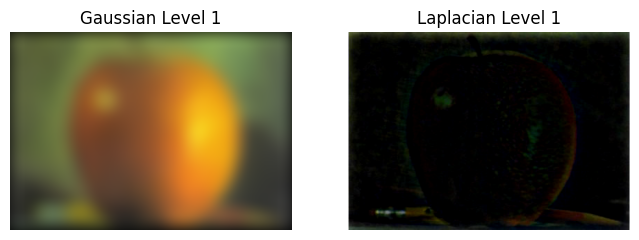

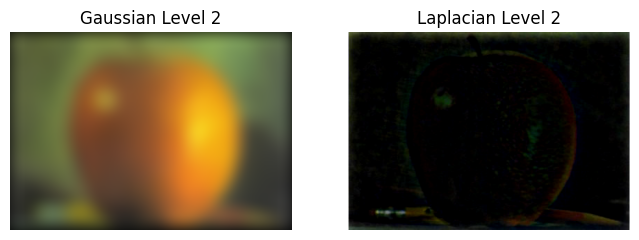

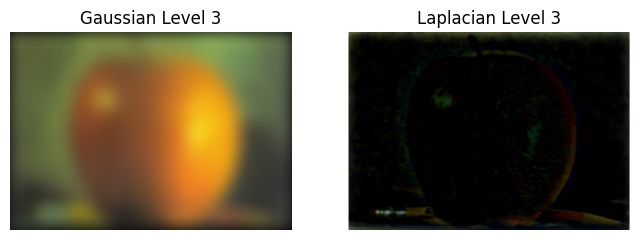

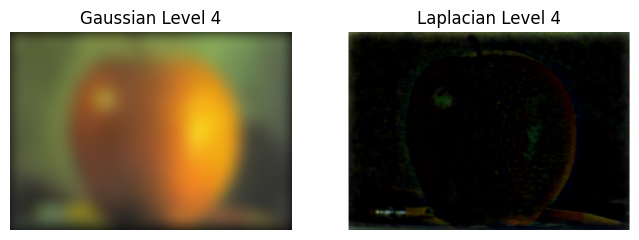

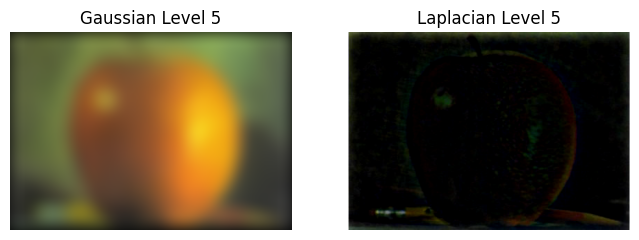

In [71]:
## Compute and display Gaussian and Laplacian Pyramids
## You also need to supply this function
images='orple.jpg'
N = 5 # suggested number of pyramid levels (your choice)

# low_r, low_b, low_g= LowPass(i)
b=41
c=11
im = skio.imread(images)
gaussian_pyr=[]
laplacian_pyr=[]

# convert to double (might want to do this later on to save memory)    
im = sk.img_as_float(im)

for n in range(N):
    curr, lap= gaussian(im,b,c)
    gaussian_pyr.append(curr)
    laplacian_pyr.append(lap)
    curr = np.clip(curr * 255, 0, 255).astype(np.uint8)
    lap = np.clip(lap * 255, 0, 255).astype(np.uint8)


    plt.figure(figsize=(8, 4))
    
    # Display Gaussian pyramid
    plt.subplot(1, 2, 1)
    plt.imshow(curr)
    plt.title(f'Gaussian Level {n+1}')
    plt.axis('off')
    
    # Display Laplacian pyramid
    plt.subplot(1, 2, 2)
    plt.imshow(lap)
    plt.title(f'Laplacian Level {n+1}')
    plt.axis('off')
    
    # Show the plot
    plt.show()
    


Part 2.4: Multiresolution Blending (a.k.a. the oraple!)

In [109]:
# Mask Gaussian
def Mask_Gaus(a,b):
    mask = np.zeros((a, b, 3), dtype=np.float32)
    mask[:, :b//2] = [1,1,1]
    return mask

<function matplotlib.pyplot.show(close=None, block=None)>

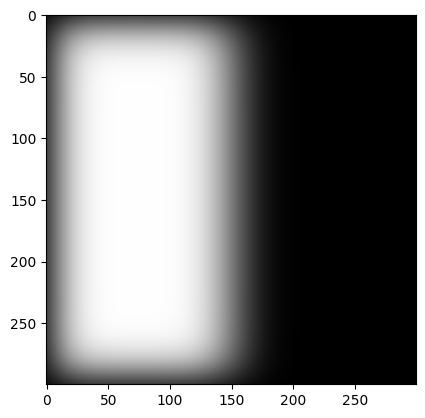

In [162]:
im1='orange.jpeg'
im2='apple.jpeg'
N = 5 # suggested number of pyramid levels (your choice)

# low_r, low_b, low_g= LowPass(i)
b=41
c=11
im1 = skio.imread(im1)
im2 = skio.imread(im2)
mask=Mask_Gaus(im1.shape[0],im1.shape[1])



masks=[]
for n in range(N):
    mask, _=gaussian(mask,b,c)
    masks.append(mask)
mask =(mask).astype(np.float32)
plt.imshow(mask)
plt.show
    


In [113]:
def gaus_lap(im, b,c,N):
    laplacian_pyr=[]
    gaussian_pyr=[]

    # convert to double (might want to do this later on to save memory)    
    for n in range(N):
        curr, lap= gaussian(im,b,c)
        gaussian_pyr.append(curr)
        laplacian_pyr.append(lap)
        # curr = np.clip(curr * 255, 0, 255).astype(np.uint8)
        # lap = np.clip(lap * 255, 0, 255).astype(np.uint8)

    return gaussian_pyr, laplacian_pyr
        # plt.figure(figsize=(8, 4))
        
        # # Display Gaussian pyramid
        # plt.subplot(1, 2, 1)
        # plt.imshow(curr)
        # plt.title(f'Gaussian Level {n+1}')
        # plt.axis('off')
        
        # # Display Laplacian pyramid
        # plt.subplot(1, 2, 2)
        # plt.imshow(lap)
        # plt.title(f'Laplacian Level {n+1}')
        # plt.axis('off')
        
        # # Show the plot
        # plt.show()

In [149]:
def masklap(stack, mask):
    s=[]
    for i in stack:
        blue,green,red = cv2.split(i)
        b,g, r = blue*mask[:,:,0], green*mask[:,:,1], red*mask[:,:,2]
        # s.append(np.dstack([b, g, r]))
        s.append(np.dstack([b, g, r]))
    return s

<function matplotlib.pyplot.show(close=None, block=None)>

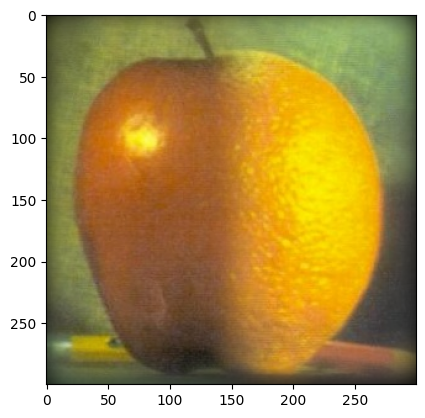

In [163]:
## Compute and display Gaussian and Laplacian Pyramids
im1='orange.jpeg'
im2='apple.jpeg'
N = 5 # suggested number of pyramid levels (your choice)

# low_r, low_b, low_g= LowPass(i)
b=41
c=11
im1 = skio.imread(im1)
im2 = skio.imread(im2)

im1 = sk.img_as_float(im1)
im2 = sk.img_as_float(im2)

im1_gaus, im1_lap=gaus_lap(im1, b,c,N)
im2_gaus, im2_lap=gaus_lap(im2, b,c,N)


im12=np.zeros((im1.shape[0],im1.shape[1],3))
# Mask lap and then add base gaus with half apple half org
# 
# mask=mask[:,:,0]
im1_lap_mask=masklap(im1_lap, cv2.flip(mask, 1))
im2_lap_mask=masklap(im2_lap, mask)

orple = np.zeros_like(im1)
orple[:, :im1.shape[1]//2]=im2[:, :im1.shape[1]//2]
orple[:, im2.shape[1]//2:]=im1[:, im2.shape[1]//2:]
im_gaus, _=gaus_lap(orple, b,c,N)

im12=np.zeros((im1.shape[0],im1.shape[1],3))
im12=np.add(im_gaus[-1],im12)
for i in range(N):
    im12 = np.add(im12, 0.2 * (im1_lap_mask[i] + im2_lap_mask[i])) 


im12= np.clip(im12*255, 0, 255).astype(np.uint8)

# hybrid=(hybrid - hybrid.min()) / (hybrid.max() - hybrid.min())

plt.imshow(im12)
plt.show
# skio.imsave(f'im12.png', hybrid)

<function matplotlib.pyplot.show(close=None, block=None)>

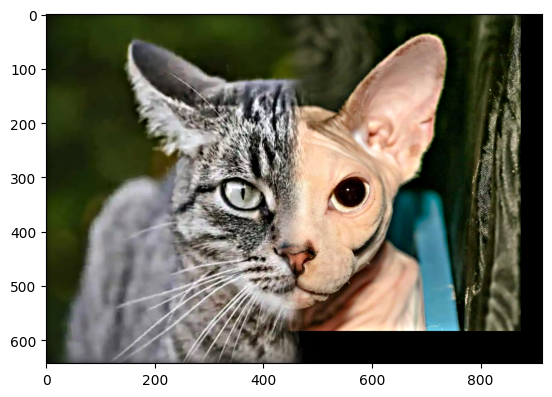

In [150]:
## Compute and display Gaussian and Laplacian Pyramids
im1='hairless.png'
im2='hairfull.png'
N = 5 # suggested number of pyramid levels (your choice)

# low_r, low_b, low_g= LowPass(i)
b=41
c=11
im1 = skio.imread(im1)
im2 = skio.imread(im2)

im1 = sk.img_as_float(im1)
im2 = sk.img_as_float(im2)

im1_gaus, im1_lap=gaus_lap(im1, b,c,N)
im2_gaus, im2_lap=gaus_lap(im2, b,c,N)
mask=Mask_Gaus(im1.shape[0],im1.shape[1])



masks=[]
for n in range(N):
    mask, _=gaussian(mask,b,c)
    masks.append(mask)
mask =(mask).astype(np.float32)



im12=np.zeros((im1.shape[0],im1.shape[1],3))
# Mask lap and then add base gaus with half apple half org
# 
# mask=mask[:,:,0]
im1_lap_mask=masklap(im1_lap, cv2.flip(mask, 1))
im2_lap_mask=masklap(im2_lap, mask)

orple = np.zeros_like(im1)
orple[:, :im1.shape[1]//2]=im2[:, :im1.shape[1]//2]
orple[:, im2.shape[1]//2:]=im1[:, im2.shape[1]//2:]
im_gaus, _=gaus_lap(orple, b,c,N)

im12=np.zeros((im1.shape[0],im1.shape[1],3))
im12=np.add(im_gaus[-1],im12)
for i in range(N):
    im12 = np.add(im12, 0.3 * (im1_lap_mask[i] + im2_lap_mask[i])) 


im12= np.clip(im12*255, 0, 255).astype(np.uint8)

# hybrid=(hybrid - hybrid.min()) / (hybrid.max() - hybrid.min())

plt.imshow(im12)
plt.show
# skio.imsave(f'im12.png', hybrid)

<function matplotlib.pyplot.show(close=None, block=None)>

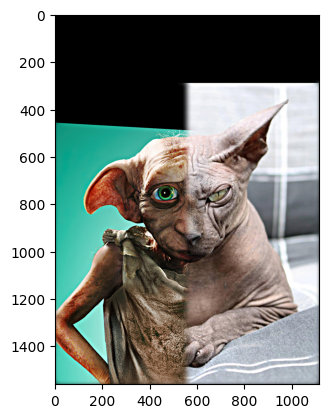

In [152]:
## Compute and display Gaussian and Laplacian Pyramids
im1='ugly.png'
im2='doby.png'
N = 5 # suggested number of pyramid levels (your choice)

# low_r, low_b, low_g= LowPass(i)
b=41
c=11
im1 = skio.imread(im1)
im2 = skio.imread(im2)

im1 = sk.img_as_float(im1)
im2 = sk.img_as_float(im2)

im1_gaus, im1_lap=gaus_lap(im1, b,c,N)
im2_gaus, im2_lap=gaus_lap(im2, b,c,N)
mask=Mask_Gaus(im1.shape[0],im1.shape[1])



masks=[]
for n in range(N):
    mask, _=gaussian(mask,b,c)
    masks.append(mask)
mask =(mask).astype(np.float32)



im12=np.zeros((im1.shape[0],im1.shape[1],3))
# Mask lap and then add base gaus with half apple half org
# 
# mask=mask[:,:,0]
im1_lap_mask=masklap(im1_lap, cv2.flip(mask, 1))
im2_lap_mask=masklap(im2_lap, mask)

orple = np.zeros_like(im1)
orple[:, :im1.shape[1]//2]=im2[:, :im1.shape[1]//2]
orple[:, im2.shape[1]//2:]=im1[:, im2.shape[1]//2:]
im_gaus, _=gaus_lap(orple, b,c,N)

im12=np.zeros((im1.shape[0],im1.shape[1],3))
im12=np.add(im_gaus[-1],im12)
for i in range(N):
    im12 = np.add(im12, 0.3 * (im1_lap_mask[i] + im2_lap_mask[i])) 


im12= np.clip(im12*255, 0, 255).astype(np.uint8)

# hybrid=(hybrid - hybrid.min()) / (hybrid.max() - hybrid.min())

plt.imshow(im12)
plt.show
# skio.imsave(f'im12.png', hybrid)

In [205]:
## Compute and display Gaussian and Laplacian Pyramids
from skimage import io, transform
im1='penguin.png'
im2='kitty.png'
im_mask='penguitty_mask.png'
N = 5 # suggested number of pyramid levels (your choice)

# low_r, low_b, low_g= LowPass(i)
b=41
c=11
im1 = skio.imread(im1)
im2 = skio.imread(im2)
im_mask = skio.imread(im_mask)
# print()
# print("image",im_mask.shape)
im_mask = transform.resize(im_mask, im1.shape, anti_aliasing=True)



im1 = sk.img_as_float(im1)
im2 = sk.img_as_float(im2)
mask=sk.img_as_float(im_mask)

im1_gaus, im1_lap=gaus_lap(im1, b,c,N)
im2_gaus, im2_lap=gaus_lap(im2, b,c,N)
# mask=Mask_Gaus(im1.shape[0],im1.shape[1])

# image1_resized = transform.resize(mask, im1, anti_aliasing=True)

masks=[]
# mask=mask[:,:,0]
for n in range(N):
    mask, _=gaussian(mask,b,c)
    masks.append(mask)
mask =(mask).astype(np.float32)



im12=np.zeros((im1.shape[0],im1.shape[1],3))
# Mask lap and then add base gaus with half apple half org
# 
# mask=mask[:,:,0]
im1_lap_mask=masklap(im1_lap, cv2.flip(mask, 1))
im2_lap_mask=masklap(im2_lap, mask)

orple = np.zeros_like(im1)
orple[:, :im1.shape[1]//2]=im2[:, :im1.shape[1]//2]
orple[:, im2.shape[1]//2:]=im1[:, im2.shape[1]//2:]
im_gaus, _=gaus_lap(orple, b,c,N)

im12=np.zeros((im1.shape[0],im1.shape[1],3))
im12=np.add(im_gaus[-1],im12)
for i in range(N):
    im12 = np.add(im12, 0.3 * (im1_lap_mask[i] + im2_lap_mask[i])) 


im12= np.clip(im12*255, 0, 255).astype(np.uint8)

# hybrid=(hybrid - hybrid.min()) / (hybrid.max() - hybrid.min())

plt.imshow(im12)
plt.show
skio.imsave(f'penguitty.png', hybrid)

C:\Users\Jae\AppData\Local\Temp\ipykernel_40660\1920435496.py:7: FutureWarning: Parameter `output` is deprecated since version 0.23 and will be removed in 0.25 (or later). To avoid this warning, please use the parameter `out` instead. For more details, see the documentation of `gaussian`.
  curr, lap= gaussian(im,b,c)


AttributeError: 'int' object has no attribute 'dtype'